# Credit Rating 



#### Contexto: 

Neste problema iremos realizar a predição de bons e maus pagadores, ou seja, aqueles clientes em que possuem mais de 6 meses de relacionamento com a empresa e pagou todas as faturas até a data limite do pagamento ou não. 


**Dataset:**
- https://www.kaggle.com/rikdifos/credit-card-approval-prediction

**Índice:**

1. [Import Packages](#1.0-Imports)
2. [Exploratory Data Analysis](#2.0-EDA)
3. [Data Processing](#3.0-Data-Processing)

    * 3.1 [Funções Iniciais](#3.1-Tratamento-de-dados)
    * 3.2 [Pré Processamento](#3.2-Pré-Processamento)

4. [Models](#4.0-Models)

    * 4.1 [Regressão Logistica](#4.1-Regressão-Logistica)
    * 4.2 [Decision Tree](#4.2-Decision-Tree)
    * 4.3 [Random Forest](#4.3-Random-Forest)
    * 4.4 [Naive Bayes](#4.4-Naive-Bayes)
    * 4.5 [Suport Vector Machine](#4.4-Suport-Vector-Machine)

5. [Results](#5.0-Results)


## 1.0 Imports


Importando bibliotecas utilizadas.

In [ ]:
! pip install imblearn

     |████████████████████████████████| 206 kB 29.2 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
import os
from scipy import stats
from scipy.stats import norm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Pre processamento
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

# Modelagem e escolha de parametros
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


# Métricas
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import plot_confusion_matrix

# ! pip install imblearn

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importando a base referente às transações e características do cliente
path = 'datasets/credit_record.csv'
df_record = pd.read_csv(path)

#Importando a base referente somente
path_aplication = 'datasets/application_record.csv'
df_aplication   = pd.read_csv(path_aplication)

## 2.0 EDA

**Metadados**
 
 Neste problema temos duas bases de dados distintas, **credit_record.csv** referente a dados de pagamento do cartão de crédito e **application_record.csv** referente às características dos aplicantes para conseguir a concessão de crédito. 

Nossos atributos são:

* **credit_record**: 
    - **ID**; Identificador unico de cliente. Coluna do tipo int64.
    
    - **MONTHS_BALANCE**; Mês referente ao pagamento do cartão, a referencia é baseado na regra: 0 se a conta esta no mês atual e, número negativo de referencia (exemplo: -1, se a conta for referente ao mês anterior, e assim sucessivamente. Coluna do tipo int64, indo de 0 até -60.
    
    - **STATUS**; Informação referente a situação de pagamento do cartão de crédito. Coluna do tipo object.
    
        * '0', Atraso do pagamento entre 1-29 dias.
        * '1', Atraso do pagamento entre 30-59 dias.
        * '2', Atraso do pagamento entre 60-89 dias.
        * '3', Atraso do pagamento entre 90-119 dias.
        * '4', Atraso do pagamento entre 120-149 dias.
        * '5', Dívidas vencidas ou inadimplentes, fatura não paga por mais de 150 dias.
        * 'C', Em dia no mês X.
        * 'X', Sem fatura para o mês.
        
  
* **application_record**: 

    - **CODE_GENDER**; Código identificador de gênero, atribui "F" para mulheres e "M" para homens. Coluna do tipo object.
    
    - **FLAG_OWN_CAR**; Bandeira que atribui "Y" se o cliente possui carro em sua posse e "N", caso contrário. Coluna do tipo object.
    
    - **FLAG_OWN_REALTY**; Bandeira que atribui "Y" se o cliente possui um imóvel em sua posse e "N", caso contrário. Coluna do tipo object.
    
    - **FLAG_MOBIL**; Bandeira que atribui "1" se o cliente possui número do aparelho celular cadastrado.Coluna do tipo int64.

    - **FLAG_WORK_PHONE**; Bandeira que atribui "1" se o cliente possui telefone de trabalho cadastrado e "0", caso contrário. Coluna do tipo int64.
    
    - **FLAG_PHONE**; Bandeira que atribui "1" se o cliente possui telefone de casa cadastrado e "0", caso contrário.Coluna do tipo int64.
    
    - **FLAG_EMAIL**; Bandeira que atribui "1" se o cliente possui e-mail pessoal cadastrado e "0", caso contrário. Coluna do tipo object.
    
    - **CNT_FAM_MEMBERS**; coluna com a quantidade de membros familiares do cliente, ou seja, o tamanho da família. Coluna do tipo int64.
        
    - **CNT_CHILDREN**; Quantidade de filhos do cliente. Coluna do tipo int64.
    
    - **AMT_INCOME_TOTAL**; Valor do montante total de salário do cliente anual. Coluna do tipo int64.
   
    - **DAYS_BIRTH**; Quantidade de dias entre o nascimento do cliente e a data atual.Coluna do tipo int64.

    - **DAYS_EMPLOYED**; Quantidade de dias entre a data de admissão do cliente e a data atual. Coluna do tipo int64.
    
    - **OCCUPATION_TYPE**; Coluna com informação sobre o cargo do emprego do cliente. Coluna do tipo object. Podem ser atribuidos os valores abaixo:
         * 'Accountants',
         * 'Cleaning staff',
         * 'Cooking staff',
         * 'Core staff',
         * 'Drivers',
         * 'HR staff',
         * 'High skill tech staff',
         * 'IT staff',
         * 'Laborers',
         * 'Low-skill Laborers',
         * 'Managers',
         * 'Medicine staff',
         * 'Private service staff',
         * 'Realty agents',
         * 'Sales staff',
         * 'Secretaries',
         * 'Security staff',
         * 'Waiters/barmen staff',
         
    - **NAME_INCOME_TYPE**; Tipo de vinculo empregaticio do cliente, coluna do tipo object. Podem ser atribuidos os valores abaixo:
    
        * 'Commercial associate': Comerciante.
        * 'Pensioner': Pensionista ou aposentados.
        * 'State servant': Servidores públicos.
        * 'Student': Estudante.
        * 'Working': Trabalhador formal.
        
    - **NAME_EDUCATION_TYPE**; Titulo educacional do cliente, coluna do tipo object. Podem ser atribuidos os valores abaixo:
    
        * 'Academic degree', 
        * 'Higher education',
        * 'Incomplete higher',
        * 'Lower secondary',
        * 'Secondary / secondary special'
    
    - **NAME_FAMILY_STATUS**; Situação civil do cliente. coluna do tipo object. Podem ser atribuidos os valores abaixo:
    
        * 'Civil marriage': 
        * 'Married':
        * 'Separated':
        * 'Single / not married':
        * 'Widow':
        
    - **NAME_HOUSING_TYPE**; 
    
        * 'Co-op apartment':
        * 'House / apartment':
        * 'Municipal apartment':
        * 'Office apartment':
        * 'Rented apartment':
        * 'With parents': 

In [3]:
df_record.head()
df_aplication.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [4]:
print('Este conjunto de dados possui ', df_record.shape[1],' colunas e ', df_record.shape[0], ' linhas. Dessas estão representados', len(set(df_record))
          , 'clientes.\n')

Este conjunto de dados possui  3  colunas e  1048575  linhas. Dessas estão representados 3 clientes.



## 3.0 Data Processing

### 3.1 Tratamento Inicial

In [5]:
################################################# Tratamento dos dados pessoais

# CODE_GENDER
df_aplication['CODE_GENDER'] = df_aplication['CODE_GENDER'].replace(['F','M'] , [1, 0])

# FLAG_OWN_CAR
df_aplication['FLAG_OWN_CAR'] = df_aplication['FLAG_OWN_CAR'].replace(['Y','N'] , [1, 0])

# FLAG_OWN_REALTY
df_aplication['FLAG_OWN_REALTY'] = df_aplication['FLAG_OWN_REALTY'].replace(['Y','N'] , [1, 0])

# AGE
df_aplication['AGE'] = round(- df_aplication['DAYS_BIRTH'] / 365.25, 0) 

# Years Employee
df_aplication['YEARS_EMPLOYEE'] = round(- df_aplication['DAYS_EMPLOYED'] / 365.25, 1) 
df_aplication['YEARS_EMPLOYEE'][df_aplication['YEARS_EMPLOYEE'] < 0] = 0



################################################ Tratamento do dataframe de faturas

# Coluna Status
df_record[(df_record['STATUS'] == 'X') | (df_record['STATUS'] == 'C')] = -1
df_record['STATUS'] = df_record['STATUS'].astype(int)

# Criando o target (No caso, vamos marcar para cada fatura que o cliente teve se ele atingiu pelo menos 60 dias de atraso como MAU)
df_record['target_fat'] = np.nan
df_record['target_fat'][df_record['STATUS'] > 1] = 1 
df_record['target_fat'][df_record['STATUS'] <= 1] = 0 

temp = df_record.groupby(['ID']).apply(lambda x: pd.Series(dict(  open_month   =  ((x.MONTHS_BALANCE.min())),
                                                                  close_month  =  ((x.MONTHS_BALANCE.max())),
                                                                  n_charges = (x.MONTHS_BALANCE.count()),
                                                                  n_charges_6m = (x[x['MONTHS_BALANCE'] > -6].MONTHS_BALANCE.count()),
                                                                  target = (x.target_fat.max())
                                                                )
                                                            )
                                        )
temp.reset_index()

# Levando as informações sumarizadas para a tabela de faturas
df_record = pd.merge(df_record, temp, on = ['ID'], how = 'left')

# Novo dataframe apenas de clientes com pelo menos 3 faturas nos últimos 6 meses
record_new = df_record[(df_record['MONTHS_BALANCE'] > -6) & (df_record['n_charges_6m'] > 2)].copy()

# Juntando ambas as tabelas
df_new = pd.merge(df_aplication, record_new[['ID','open_month','close_month','target']], on = ['ID'], how = 'left')

# Dropando valores de clientes que não temos a informação de pagamento
df_new.dropna(subset=['target'], inplace  = True);

# Dropando linhas duplicadas
df_new.drop_duplicates()

# Dropando Colunas não utilizadas
df_new = df_new.drop(['DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'OCCUPATION_TYPE', 'ID'], axis=1)

df_new['tempo_relacionamento'] = df_new['close_month'] - df_new['open_month']

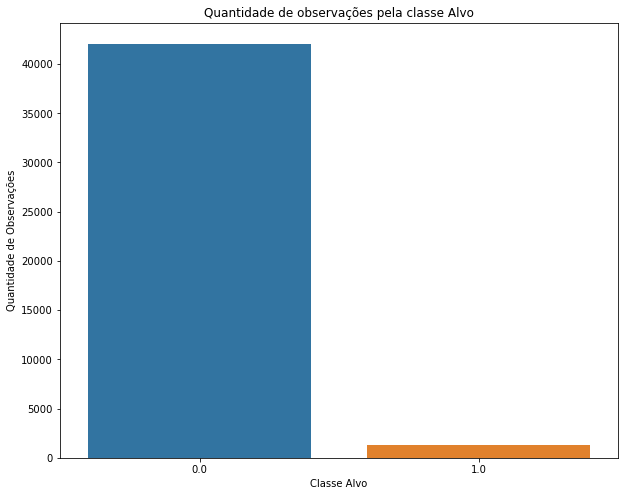

In [6]:
fig, axes = plt.subplots(figsize=(10, 8))

sns.countplot(x="target", data=df_new)

plt.title('Quantidade de observações pela classe Alvo')
plt.xlabel('Classe Alvo')
plt.ylabel('Quantidade de Observações')
plt.show()

### 3.2 Pré Processamento

In [7]:
################################################ Pré Processamento para Modelagem

################################################ Transformando as colunas categoricas em colunas booleanas
# Seleciona as colunas categoricas
colunas_categoricas = list(df_new.select_dtypes('object').columns)

# Cria um df
temp = pd.get_dummies(df_new[colunas_categoricas])

# Tira as colunas categoricas do df
df_new = df_new.drop(colunas_categoricas, axis=1)

# Atualiza o dataframe unindo as informações principais e os valores categoricos
df_new = pd.merge(df_new, temp, how = 'left', left_index=True, right_index=True)

################################################ Passando o Standard Scaler

# Tira as coluna alvo
X = df_new.drop('target', axis=1)
y = df_new['target']

# Cria o objeto do escalonador
escalonador = StandardScaler()

# Transforma os dados 
X = escalonador.fit_transform(X)

In [8]:
################################################ Splitando a base

# Divide em base de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, random_state=42)


################################################ Passando estratégia de oversampling

# Define a estratégia de oversampling
SMOTE = SMOTE()

# treina e aplica a função Smote
X_treino, y_treino = SMOTE.fit_resample(X_treino, y_treino)

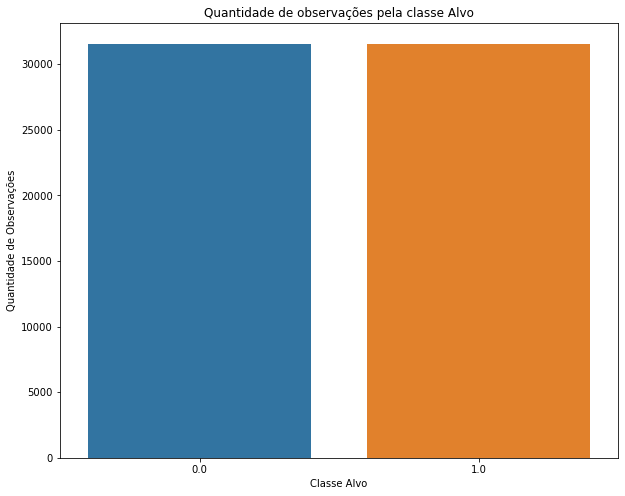

In [9]:
fig, axes = plt.subplots(figsize=(10, 8))

temp = pd.DataFrame(y_treino, columns = ['target'])
sns.countplot(x="target", data=temp)

plt.title('Quantidade de observações pela classe Alvo')
plt.xlabel('Classe Alvo')
plt.ylabel('Quantidade de Observações')
plt.show()

## 4.0 Models

##### Função de avaliação dos Modelos

In [10]:
# Avaliação de modelos de classificação

def resultados_classificacao(modelo, nome_do_modelo ):
    y_pred = np.nan
    y_pred = modelo.predict(X_teste)
    y_pred_proba = modelo.predict_proba(X_teste)[:, 1]
        
    acuracia  =  accuracy_score(y_teste,y_pred)
    f1        =  f1_score(y_teste, y_pred) 
    precisao  =  precision_score(y_teste, y_pred)
    recall    =  recall_score(y_teste,y_pred)

    print('Resultados:')
    print('Acuracia                     : ', round(acuracia*100, 2) , '%'  )
    print('F1 Score                     : ', round(f1*100, 2)        , '%'  )
    print('Precisão (Precision)         : ', round(precisao*100, 2)  , '%' )
    print('Recall                       : ', round(recall*100 , 2)   , '%'  )

    fig, axes = plt.subplots(1, 2, figsize=(20, 8))

    # Matriz de Confusão
    disp = plot_confusion_matrix(modelo, X_teste, y_teste, cmap=plt.cm.Blues, ax = axes[0])

    [fpr, tpr, thr] = roc_curve(y_teste, y_pred_proba)

    idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

    axes[1].plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
    axes[1].plot([0, 1], [0, 1], 'k--')
    axes[1].plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
    axes[1].plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')

    axes[1].set_xlabel('False Positive Rate (1 - specificity)', fontsize=14)
    axes[1].set_ylabel('True Positive Rate (recall)', fontsize=14)
    axes[1].set_title('Receiver operating characteristic (ROC) curve')
    axes[1].legend(loc="lower right");

### 4.1 Regressão Logistica

Modelo 1 - Logistic Regression

Resultados:
Acuracia                     :  73.98 %
F1 Score                     :  12.7 %
Precisão (Precision)         :  7.04 %
Recall                       :  64.26 %


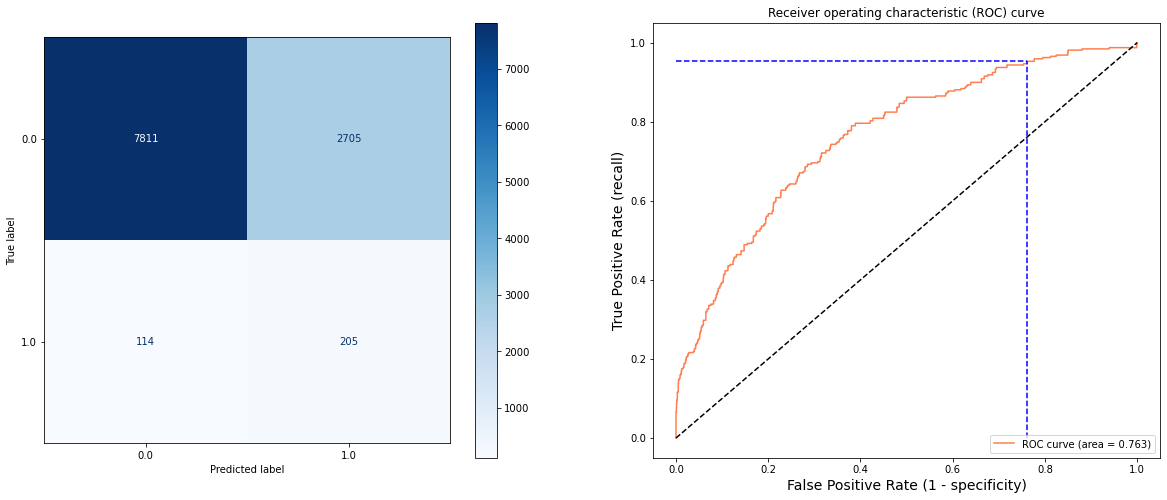

In [11]:
# Logistic Regression

print("Modelo 1 - Logistic Regression\n") 

# Cria o objeto com o modelo do SKLearn
modelo_1 = LogisticRegression()

# Treina o modelo para os dados de Treino
modelo_1.fit(X_treino, y_treino)

# Verifica os resultados
resultados_classificacao(modelo_1, 'Logistic Regression')



### 4.2 Decision Tree


Modelo 2 - Decision Tree Classifier

Resultados:
Acuracia                     :  99.87 %
F1 Score                     :  97.85 %
Precisão (Precision)         :  95.8 %
Recall                       :  100.0 %


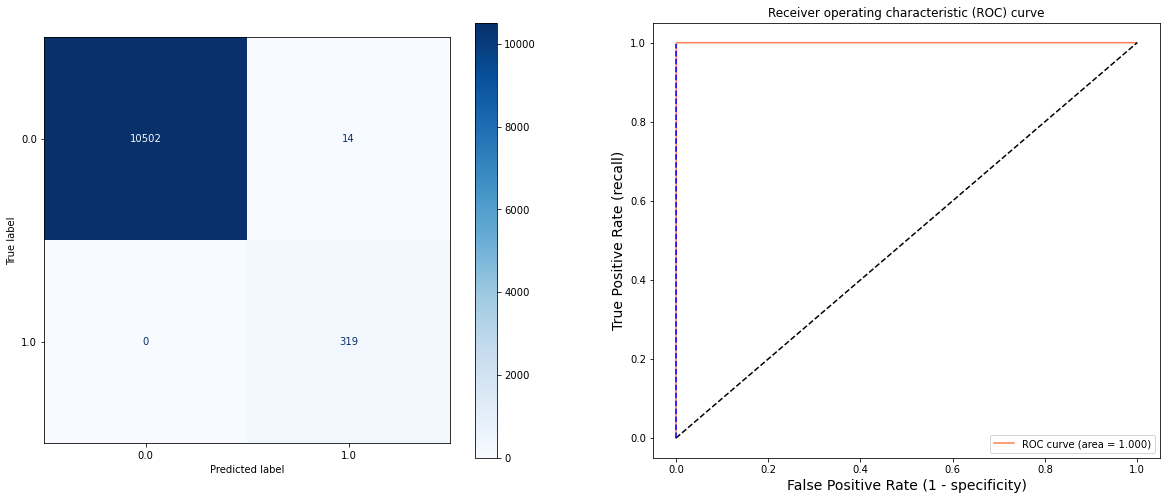

In [12]:
# Decision Tree Classifier

print("Modelo 2 - Decision Tree Classifier\n") 

# Cria o objeto com o modelo do SKLearn
modelo_1 = DecisionTreeClassifier()

# Treina o modelo para os dados de Treino

modelo_1.fit(X_treino, y_treino)

# Verifica os resultados
resultados_classificacao(modelo_1, 'Decision Tree')

### 4.3 Random Forest

Modelo 3 - Random Forest

Resultados:
Acuracia                     :  99.93 %
F1 Score                     :  98.76 %
Precisão (Precision)         :  97.55 %
Recall                       :  100.0 %


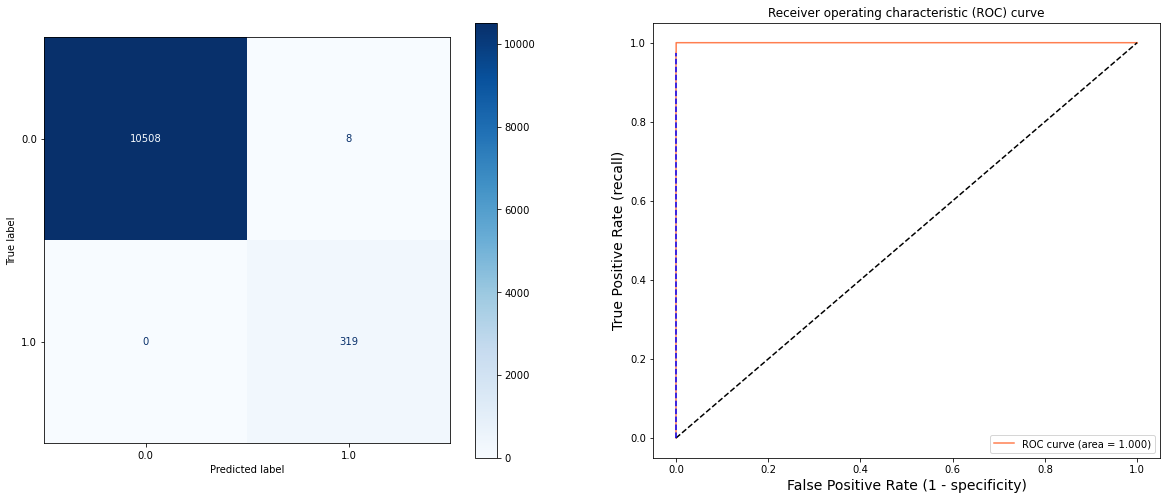

In [13]:
# Random Forest

print("Modelo 3 - Random Forest\n") 

# Cria o objeto com o modelo do SKLearn
modelo_1 = RandomForestClassifier()

# Treina o modelo para os dados de Treino
modelo_1.fit(X_treino, y_treino)

# Verifica os resultados
resultados_classificacao(modelo_1, 'Random Forest')

### 4.4 Naive Bayes

Modelo 4 - Naive Bayes

Resultados:
Acuracia                     :  3.28 %
F1 Score                     :  5.74 %
Precisão (Precision)         :  2.95 %
Recall                       :  100.0 %


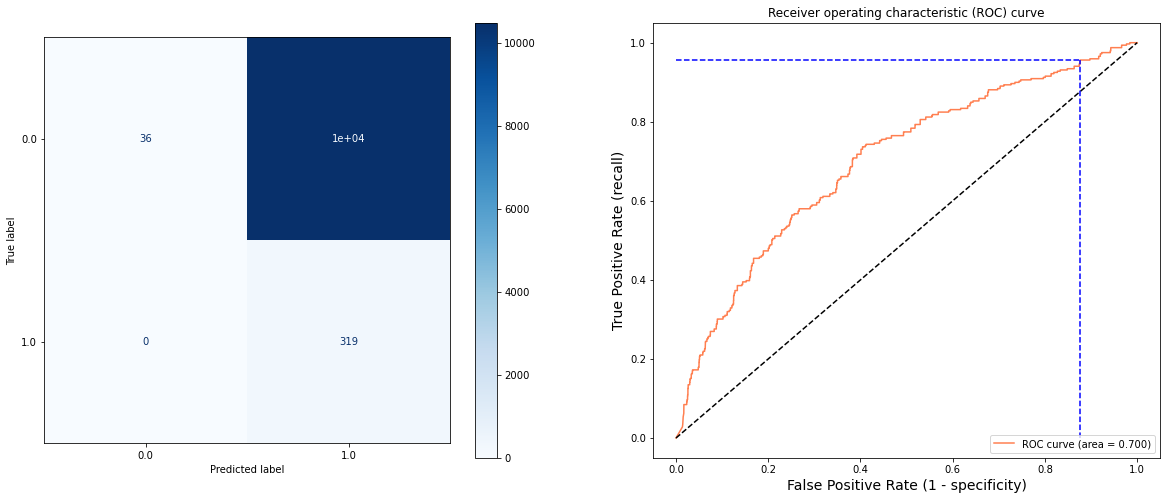

In [14]:
# Naive Bayes

print("Modelo 4 - Naive Bayes\n") 

# Cria o objeto com o modelo do SKLearn
modelo_1 = GaussianNB()

# Treina o modelo para os dados de Treino
modelo_1.fit(X_treino, y_treino)

# Verifica os resultados
resultados_classificacao(modelo_1, 'Naive Bayes')

### 4.5 Suport Vector Machine

In [ ]:
# Suport Vector Machine

print("Modelo 5 - Suport Vector Machine\n") 

# Cria o objeto com o modelo do SKLearn
modelo_1 = SVC(probability=True)

# Treina o modelo para os dados de Treino
modelo_1.fit(X_treino, y_treino)

# Verifica os resultados
resultados_classificacao(modelo_1, 'Suport Vector Machine')

Modelo 5 - Suport Vector Machine

